In [1]:
import pandas as pd
from pprint import pprint
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from pprint import pprint

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data=pd.read_csv("pre-processed-nhanes32006.csv")

## Converting ccategorical variable to type category

In [3]:
data[['hsaitmor', u'dmarethn', u'hssex', u'HAR1', u'HAD1',
       u'HAE2', u'HAC1C', u'HAC1D', u'HAF10', u'mortstat']]=data[['hsaitmor', u'dmarethn', u'hssex', u'HAR1', u'HAD1',
       u'HAE2', u'HAC1C', u'HAC1D', u'HAF10', u'mortstat']].astype('category')

In [4]:
X=data[['hsaitmor',
 'dmarethn',
 'hssex',
 'dmppir',
 'HAR1',
 'HAD1',
 'HAE2',
 'HAC1C',
 'HAC1D',
 'HAF10']]

In [5]:
Y=data[['mortstat']]

In [6]:
X.shape

(18264, 10)

In [7]:
data.dtypes

hsaitmor    category
dmarethn    category
hssex       category
dmppir       float64
HAR1        category
HAD1        category
HAE2        category
HAC1C       category
HAC1D       category
HAF10       category
mortstat    category
dtype: object

In [8]:
Y.dtypes

mortstat    category
dtype: object

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=333)


## Parameter tuning in Random Forest

In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 9)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900, 1000]}


## Fitting Random Forest Model on best parameters

In [11]:
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(xtrain, ytrain);

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=70, bootstrap=False, total=  11.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False, total=  16.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False, total=  16.5s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False, total=  16.6s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=70, bootstrap=False, total=  11.2s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=True, total=   8.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=True, total=   8.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=70, bootstrap=False, total=  11.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=True, total=   8.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=  13.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=  21.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=  21.5s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=  20.8s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=  10.8s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=  12.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=  12.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=  10.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=100, bootstrap=False, total=   6.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=100, bootstrap=False, total=   6.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=100, bootstrap=False, total=   6.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=  11.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  15.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  14.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  15.4s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=  15.2s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=  15.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=  15.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=  17.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=  16.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=  16.5s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  16.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  12.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  12.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=50, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  17.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=50, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  17.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=50, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=50, bootstrap=True, total=  10.7s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=50, bootstrap=True, total=  10.6s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  11.6s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=50, bootstrap=True, total=  10.4s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=   8.5s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=   8.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=   8.5s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True, total=   9.3s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True, total=   9.3s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True, total=   9.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=False, total=  12.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   4.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=False, total=  12.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   4.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=   2.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   4.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=   2.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=   2.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=False, total=  12.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=False, total=   9.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=False, total=   9.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=False, total=   9.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=  10.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=  19.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=  20.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=  19.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   9.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   8.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=False, total=   7.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=False, total=   8.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=False, total=   7.5s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True, total=   9.6s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False, total=   5.2s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False, total=   4.9s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True, total=   9.0s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True, total=   8.8s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False, total=   4.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False, total=  11.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False, total=  11.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=False, total=  11.5s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=  11.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=  11.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=  11.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  12.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  12.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=False, total=   7.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=False, total=   7.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=False, total=   6.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  11.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  10.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   6.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  10.5s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  10.5s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   6.4s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   6.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, bootstrap=True, total=   6.0s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, bootstrap=True, total=   6.0s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, bootstrap=True, total=   5.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True, total=   5.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  11.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  11.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  11.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True, total=   5.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True, total=   5.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=True, total=   7.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=True, total=   7.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=40, bootstrap=True, total=   7.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=  13.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=  13.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=  13.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=60, bootstrap=False, total=  11.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=60, bootstrap=False, total=   8.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=60, bootstrap=False, total=   7.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   8.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   8.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   7.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=  11.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=  11.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=  10.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=   5.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=  16.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=   7.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=  18.5s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=True, total=   3.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=   5.8s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=  19.3s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=True, total=   3.7s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=True, total=   4.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=  21.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=  21.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=  21.0s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False, total=  29.6s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False, total=  16.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False, total=  17.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False, total=  13.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False, total=  36.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False, total=  32.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True, total=  14.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   9.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True, total=  11.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=70, bootstrap=True, total=  11.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   9.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   9.2s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=  11.2s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=  12.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   7.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=  12.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   7.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   6.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=False, total=   5.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=   9.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=   9.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=  10.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=False, total=   5.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=100, bootstrap=False, total=   5.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=  11.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.1min


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=  11.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=  11.3s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  12.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=True, total=   7.3s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  13.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=True, total=   7.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  13.1s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=110, bootstrap=True, total=   7.0s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False, total=   6.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False, total=   7.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=False, total=   7.5s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True, total=   9.4s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True, total=   9.0s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True, total=   8.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=False, total=  13.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   9.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=False, total=  14.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=False, total=  13.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=  10.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=80, bootstrap=True, total=   5.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=  10.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=80, bootstrap=True, total=   5.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=80, bootstrap=True, total=  13.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=80, bootstrap=True, total=  13.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=80, bootstrap=True, total=  14.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True, total=   5.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=False, total=  19.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True, total=   6.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, bootstrap=True, total=   5.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=False, total=  27.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=False, total=  26.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.5s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True, total=   5.8s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  30.4s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  28.8s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True, total=   3.8s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True, total=   3.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  25.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   6.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   7.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   6.9s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   7.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   7.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   7.6s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   7.3s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   7.3s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   7.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  10.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False, total=  16.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False, total=  16.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False, total=  16.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   5.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   5.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  11.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   5.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  11.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False, total=   4.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False, total=   3.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False, total=   3.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=  14.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=  14.6s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=  14.7s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   8.2s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   8.2s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   8.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True, total=  10.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   7.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True, total=  10.9s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True, total=  10.8s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   7.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   7.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False, total=   3.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False, total=   3.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=  11.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=90, bootstrap=False, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=  11.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=  11.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total=   9.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total=   9.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total=   9.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False, total=  14.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=True, total=   9.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False, total=  15.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False, total=  15.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=True, total=  10.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   4.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   4.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   4.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=True, total=  10.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True, total=   4.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True, total=   4.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=110, bootstrap=True, total=   3.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   9.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   9.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   9.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=  10.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=  11.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   9.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=  11.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   9.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   8.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   8.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   9.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   9.1s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   5.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   6.2s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   6.1s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   8.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   8.1s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   8.1s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   8.8s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True, total=   4.1s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   9.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True, total=   3.8s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   8.1s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True, total=   4.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True, total=   4.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True, total=   5.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True, total=   5.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=50, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=   5.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=50, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=   5.0s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=50, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=   3.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=50, bootstrap=False, total=  11.4s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=50, bootstrap=False, total=  11.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=50, bootstrap=False, total=  11.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=  15.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=90, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=90, bootstrap=True, total=   2.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=90, bootstrap=True, total=   2.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=True, total=   3.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=True, total=   3.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=True, total=   3.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=  15.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=  15.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True, total=   7.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True, total=   7.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=40, bootstrap=False 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=110, bootstrap=True, total=   7.0s
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=40, bootstrap=False, total=  11.2s
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=40, bootstrap=False, total=  11.4s
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=40, bootstrap=False, total=  10.8s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [12]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [13]:
base_model = RandomForestClassifier(bootstrap=True,max_depth=10,max_features='auto',min_samples_leaf=1,min_samples_split=10,n_estimators= 700)
base_model.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
base_model.feature_importances_

array([0.72749399, 0.02649103, 0.01102505, 0.0541752 , 0.01705113,
       0.0274786 , 0.04272864, 0.02375104, 0.02628461, 0.04352072])

In [17]:
sorted(zip(base_model.feature_importances_, X.columns), key=lambda x: x[0],reverse=True)

[(0.7274939902695885, 'hsaitmor'),
 (0.0541752026173503, 'dmppir'),
 (0.043520716891834926, 'HAF10'),
 (0.04272863738841559, 'HAE2'),
 (0.027478596539513334, 'HAD1'),
 (0.026491025251314835, 'dmarethn'),
 (0.02628461147712137, 'HAC1D'),
 (0.02375103667376145, 'HAC1C'),
 (0.01705113355781564, 'HAR1'),
 (0.011025049333284317, 'hssex')]

In [18]:
y_pred = base_model.predict(xtest)


In [19]:
base_model.score(xtest, ytest) #Accuracy


0.8644949356693129

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)


In [21]:
cm #Confusion Matrix

array([[2415,  188],
       [ 307,  743]])

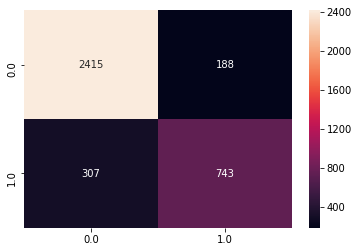

In [26]:
import seaborn as sns
labelname = base_model.classes_
sns.heatmap(cm, annot=True,  fmt='', xticklabels=labelname, yticklabels=labelname);

In [27]:
from sklearn.metrics import classification_report
print (classification_report(ytest, y_pred))

             precision    recall  f1-score   support

        0.0       0.89      0.93      0.91      2603
        1.0       0.80      0.71      0.75      1050

avg / total       0.86      0.86      0.86      3653



In [28]:
import pickle
filename = 'Random-Forest-nhanes.sav'
pickle.dump(base_model, open(filename, 'wb'))



